## HW#2 Supervised Learning I

In this assignment, you are going to practice supervised learning ML modelings. 

**DUE: 10/12/2020 Thursday 11:59 PM.**

### Problem #1 Linear Regression (20 pts)
Data: Bike Sharing Dataset

#### Data Set
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

#### Files
- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

#### Dataset Characteristics:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
#### Task
- Predict the count of total rental bikes including both casual and registered.
- Test Set: Daily Basis - August, Hourly Basis - Summer Season (June, July, and August from 10 AM to 2 PM)

a) (2 pts) Split the datasets into train and test sets. (do for both)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
hour = pd.read_csv("hour.csv")
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
trainh, testh = train_test_split(hour, test_size=0.2)
traind, testd = train_test_split(day, test_size=0.2)

In [4]:
print(len(trainh),"train hour",len(testh),"test hour")

13903 train hour 3476 test hour


In [5]:
print(len(traind),"train day",len(testd),"test day")

584 train day 147 test day


b) (2 pts) Before you do anything with the train datasets, which features can be deleted? Explain why. (do for both)

holiday and weekday can be deleted since they both are combined into working day. Year and month can also be deleted since they are included in date. atemp can be deleted since we have temp.

In [6]:
traind = traind.drop(["holiday","temp","dteday","instant"], axis=1)
testd = testd.drop(["holiday","temp","dteday","instant"],axis=1)
trainh = trainh.drop(["holiday","temp","dteday","instant"],axis=1)
testh = testh.drop(["holiday","temp","dteday","instant"],axis=1)
testh.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
14115,3,1,8,8,4,1,1,0.6364,0.61,0.1940,33,649,682
13043,3,1,7,16,1,1,1,0.7424,0.36,0.2836,61,304,365
10199,1,1,3,1,2,1,1,0.1970,0.44,0.2537,0,6,6
1026,1,0,2,11,2,1,1,0.2424,0.25,0.2537,11,46,57
183,1,0,1,22,6,0,1,0.1061,0.36,0.3881,1,33,34


c) (2 pts) Make `weathersit` and `weekday` one-hot vectors. (do for both)
- Do you think this process is necessary? Do you find other features that are necessary to do this? Explain why. If you find any features that are needed to be tranformed into one-hot vectors, please do. 
- **Do not** do on the test sets here as well as step d).  

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
### Code Starts Here ###
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = 'auto')
x= encoder.fit_transform(traind[['weekday','weathersit']]).toarray()


In [9]:
encoder = OneHotEncoder(categories = 'auto')
y= encoder.fit_transform(trainh[['weekday','weathersit']]).toarray()
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


one hot vectors make categorial features esier to predict. Other features that can be transformed to vectors are season, hour, and workingday.

In [10]:
encoder = OneHotEncoder(categories = 'auto')
a= encoder.fit_transform(traind[['season','workingday','yr']]).toarray()
print(a)

[[0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]]


In [11]:
encoder = OneHotEncoder(categories = 'auto')
b= encoder.fit_transform(trainh[['season','workingday',"yr"]]).toarray()
print(b)

[[0. 1. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


d) (2 pts) Using the train sets, find the correlation between coorelations between features and target variable. 
   - Did you find other features that can be deleted? Explain why. 

In [12]:
### Code Starts Here ###
corr_matrix = traind.corr()
corr_matrix['weekday'].sort_values(ascending=False)

weekday       1.000000
casual        0.066781
cnt           0.061900
registered    0.047737
workingday    0.037100
weathersit    0.029235
atemp        -0.007971
yr           -0.011254
windspeed    -0.012050
mnth         -0.034372
hum          -0.043950
season       -0.044479
Name: weekday, dtype: float64

weekday does not seem to have much correlation with any of the other values

In [13]:
corr_matrix['weathersit'].sort_values(ascending=False)

weathersit    1.000000
hum           0.583700
workingday    0.043825
weekday       0.029235
mnth          0.028111
season        0.016963
windspeed     0.009086
yr           -0.053452
atemp        -0.106380
casual       -0.221284
registered   -0.255204
cnt          -0.283488
Name: weathersit, dtype: float64

weathersit has the highest correlation humidity, which makes sense since the weather changes with humidity

In [14]:
corrh_matrix = trainh.corr()
corrh_matrix['weekday'].sort_values(ascending=False)

weekday       1.000000
workingday    0.041827
casual        0.031421
cnt           0.026871
registered    0.021893
mnth          0.012399
windspeed     0.004881
weathersit    0.001384
season       -0.001423
yr           -0.002647
hr           -0.003655
atemp        -0.004684
hum          -0.039426
Name: weekday, dtype: float64

In [15]:
corrh_matrix['weathersit'].sort_values(ascending=False)

weathersit    1.000000
hum           0.420623
workingday    0.042827
windspeed     0.024275
mnth          0.006615
weekday       0.001384
season       -0.014928
yr           -0.016971
hr           -0.024705
atemp        -0.105469
registered   -0.119737
cnt          -0.141951
casual       -0.153646
Name: weathersit, dtype: float64

In [16]:
corrh_matrix['hr'].sort_values(ascending=False)

hr            1.000000
cnt           0.393062
registered    0.373366
casual        0.299088
windspeed     0.136741
atemp         0.130253
workingday    0.004713
weekday      -0.003655
season       -0.007212
mnth         -0.008656
yr           -0.009713
weathersit   -0.024705
hum          -0.273951
Name: hr, dtype: float64

the count of bikes has the biggest correlation with the hour, however after looking through the correlations since most values are closer to 0, there arent other columns to drop since they all have their own meaning

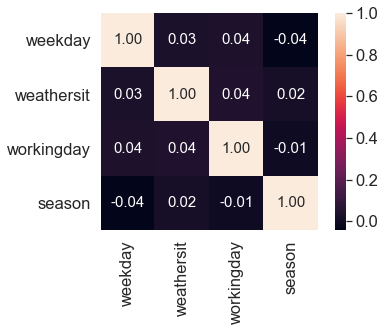

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=['weekday','weathersit','workingday','season']
cm=np.corrcoef(traind[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

e) (1 pts) Do you think you need to do cross-validation? What is the advantage and disadvantage of doing it?

### Answer Here ###
It would be good to do a cross validation to make sure the model has the right patterns and that it isnt getting too much noise. Advantage would to have more accurate estimate of out of sample accurac, more efficient use of data, and tune parameters for better generalization. A con would be the final results may be sensitve to how data was split for validation.

f) (7 pts) Using `LinearRegression` from `sklearn` and `polyfit` from `numpy`, train two models each by having all features and 5 features based on step a) thru d). You might have to train polynomial model multiple times and you may go back do futher feature engineerings. **If you do, please show all work. Do not erase any work.** (do for both)

In [126]:
### Code Starts Here ###
from sklearn.linear_model import LinearRegression
from numpy import polyfit

#day = day[['mnth','atemp','hum','windspeed','casual','registered']]
#x= encoder.fit_transform(X[['weekday','weathersit','season','workingday','yr']]).toarray()
X=pd.get_dummies(day)
y=day['cnt']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
slrd=LinearRegression()
slrd.fit(X_train, y_train)

LinearRegression()

In [140]:
#polyfit data sizing
pX= list(X_train.to_records(index=False))
print(pX)

[(98, 2, 0, 4, 0, 5, 1, 2, 0.335833, 0.324479, 0.83625, 0.226992, 172, 1299, 1471, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [139]:
plyd=np.polyfit(X,y,1)
pred = np.poly1d(plyh)

TypeError: expected 1D vector for x

In [260]:
A = hour[['season','hr','yr','mnth','weekday','weathersit','workingday','atemp','hum','windspeed','casual','registered']]
encoder = OneHotEncoder(categories = 'auto')
A= encoder.fit_transform(A[['weekday','weathersit','season','workingday','yr']]).toarray()
b=hour['cnt']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
slrh=LinearRegression()
slrh.fit(A_train, b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
b_train_pred=slrh.predict(A_train)

In [263]:
e = pd.DataFrame([[1,2],[3,4],[5,6]],columns=['A','b'])
a = np.array(e['A'])
B = np.array(e['b'])
plyd=np.polyfit(a.flatten(),B,1)
predict = np.poly1d(plyd)

g) (2 pts) Report value of coefficent ${\bf w}$, **RMSE**, and **$R^2$** of all models. Which model is the best? Explain why. (asnwer for both data sets)

In [372]:
### Code Starts Here ###
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import 
print('MSE train day: %.3f' %(mean_squared_error(y_train,y_train_pred)))
print('R^2 train day sklearn: %.3f' %(r2_score(y_train,y_train_pred)))
print(slrd.coef_)

MSE train day: 0.000
R^2 train day sklearn: 1.000
2.7620526452665217e-06


h) (2 pts) Using the best model out of 4 models, evaluate the model using the test sets. Can you use a model from daily data to hourly test set? Explain why or why not. 

In [202]:
### Code Starts Here ###

### Problem 2 - Non-probabilitistc Classifications (Lecture 3 and 4) (32 pts)
Dataset: Iris Data - find here: https://archive.ics.uci.edu/ml/datasets/iris

a) (8 pts) Implement KNN algorithm, call it `myKNN`. You are welcome to use `numpy` for implementation but nothing else. 

In [60]:
### Code Starts Here ###
import pandas as pd
import numpy as np
from sklearn import datasets
import operator
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, names=['sepal_length','sepal_width','petal_length','petal_width','type'])
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [67]:
print(iris_data.describe())
print(iris_data['type'].value_counts())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: type, dtype: int64


In [93]:
def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

def myKNN(trainingSet, testInstance, k):
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    neighbors = []
    counts = {"Iris-setosa":0,"Iris-versicolor":0,"Iris-virginica":0}
    
    # find the distances of the training
    for x in range(len(trainingSet)):
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
    
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) #by using it we store indices also
    sorted_d1 = sorted(distances.items())
    
    # take top k neighbours
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    
    # find the top type in the neighbours
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
            
    sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0])

In [94]:
testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
result = myKNN(iris_data, test, 4)#here we gave k=4
print("type is:",result)

type is: Iris-setosa


b)(4 pts) Without splitting the dataset, classify the names using `myKNN` from $k=1$ to $25$. Then report the accuracy of `myKNN` for each $k$ value. You are free to extend the range of $k$ values up to $50$. 

In [99]:
### Code Starts Here ###
#accuracy = (correctly predicted class / total testing class) × 100%

def test_myKNN(k):
    correctly_predicted = 0
    total = 150
    for row_num,row in iris_data.iterrows():
        testSet = [[row['sepal_length'], row['sepal_width'], row['petal_length'], row['petal_width']]]
        test = pd.DataFrame(testSet)
        result = myKNN(iris_data, test, k)
        if(result == row['type']):
            correctly_predicted += 1
    return correctly_predicted / total

results_myKNN = []

for x in range(1,26):
    res = test_myKNN(x)
    results.append(res)
    print(str(x)+ " " + str(100 * res) + "%")
print(results_myKNN)

1.0
0.98
0.96
0.96
0.9666666666666667
0.9733333333333334
0.9733333333333334
0.98
0.98
0.98
0.9733333333333334
0.98
0.98
0.98
0.9866666666666667
0.9866666666666667
0.98
0.9733333333333334
0.98
0.98
0.98
0.98
0.98
0.9733333333333334


c) (2 pts) Do the same as b) using `sklearn.neighbors`. 

In [118]:
### Code Starts Here ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X=iris_data.iloc[:,:4] #all parameters
y=iris_data["type"] #class labels

In [123]:
def test_KNN():
    arr = []
    for x in range(1,26):
        knn=KNeighborsClassifier(n_neighbors=x, p=2, metric='minkowski')
        knn.fit(X, y)
        res = knn.predict(X)
        arr.append(accuracy_score(y_pred=res, y_true=y))
        print(str(x) + " " + str(100 * accuracy_score(y_pred=res, y_true=y)) + "%")
    return arr

In [125]:
res_sklearn_knn_res = test_KNN()

1 100.0%
2 98.0%
3 96.0%
4 96.0%
5 96.66666666666667%
6 97.33333333333334%
7 97.33333333333334%
8 98.0%
9 98.0%
10 98.0%
11 97.33333333333334%
12 98.0%
13 98.0%
14 98.0%
15 98.66666666666667%
16 98.66666666666667%
17 98.0%
18 97.33333333333334%
19 98.0%
20 98.0%
21 98.0%
22 98.0%
23 98.0%
24 97.33333333333334%
25 98.0%


d) (2 pts) Make a visual presentation of results from b) and c). You can simply make a accuracy vs. $k$ plot. Report the best $k$ value for both. Did you expect the results to be the same? Explain why or why not. 

In [ ]:
### Code Starts Here ###
#idk how to plot
#use res_sklearn_knn_res, and results_myKNN to plot

e) (6 pts) Implement Linear Discriminant Analysis (call it `myLDA`) for each pair of the classes and report your results.

In [ ]:
#def myLDA(n_components, X_train, y_train):
    
    

In [363]:
### Code Starts Here ###
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [364]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)


In [365]:
X_train_lda=lda.fit_transform(X_train_std, y_train)

/Users/isabellalfairman/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [366]:
from sklearn.linear_model import LogisticRegression

In [367]:
lr=LogisticRegression()
Ir=lr.fit(X_train_lda,y_train)

/Users/isabellalfairman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/isabellalfairman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [368]:
from sklearn import discriminant_analysis
LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(iris.data, iris.target)
LDA.score(iris.data, iris.target)

0.98

The sudo code of LDA is
1. Standardize the d-dimentaional dataset (d is the number of features)
2. For each class, compute the d-dimentional mean vector.
3. Construct the between-class matrix  𝑆𝐵 and the within-in class scatter matrix  𝑆𝑤
4. Compute the eigenvectors and corresponding eigenvalues of the matrix  𝑆−1𝑤𝑆𝐵
      Usenumpy.linag.eig() or similar.
5. Sort thee eigenvalues by decreasing order to rank the corresponding egenvectors.
6. Choose the  𝑘 eignvectors that correspond to the 𝑘 largest eigenvalues to construct a  𝑑×𝑘− dimentional transformation matrix  𝑊: the eigenvectors are the column of this matrix.
    Use numpy.hstack()or somthing similar.
7. Project the samples onto the new feature subspace using the transformation matrix  𝑊
    𝑋′=𝑋𝑊

 

### Problem 3 - Logistic Regression (Lecture 4)
(8 pts) In this problem you are going to built a logistic regression, `myLogistic`. The confirmation of the function will be done in HW#3. 
Here is a brief pseudo code. 

a. Initialize the weight and bias.

b. A sigmoid function

c. Forward/backward Propagation functions $𝑧=𝑥_1𝑤_1+\cdots+𝑥_n𝑤_n+𝑏$

d. Updating Parameters Function

e. Prediction Function

f. Main Function - Logistic Regression

g. Calculate the accuracy

In [ ]:
### Code Starts Here ###
##source https://medium.com/@opetundeadepoju/a-step-by-step-tutorial-on-coding-neural-network-logistic-regression-model-from-scratch-5f9025bd3d6
def initialize(m):
    w = np.zeros((m,1)) ##weight initialized to vector(dim(m),1)
    b=0    ##scalar corresponding to bias
    return w,b

def sigmoid(z):
    s = 1/(1+np.exp(-z)) #sigmoid function
    return s

def propogations(w,b,X,Y):
    ##using w,b,X(input data),Y(label vector) 
    ##returning cost, dw(effect on cause of change in w), db(effect on cause of change in b)
    m = X.shape[1]
    
    #forward
    A = sigmoid(np.dot(w.T,x)+b) #activation function
    cost = -(1/m)*(np.sum((Y*np.log(A)) +(1-y)*np.log(1-A)))
    
    #backward
    dw = (1/m)*np.dot(X, ((A-Y).T))
    db = (1/m)*np.sum(A-Y)
    
    grads = {"dw": dw,
            "db" : db}
    return grads, cost
    
def updateParamPredict(w,b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    #prediction
    for i in range(A.shape[1]):
        Y_prediction[0,1]=1 
            if A[0,i]>0.5:
                0
            else:
                pass
    return Y_prediction

def myLogistic